# <center>HR Analytics - Employee Attrition Prediction</center>

## Executive Summary

__<font color=Blue>Purpose</font>__:   
The purpose of this analysis is to uncover the factors that lead to employee attrition.

__<font color=Blue>Data Source</font>__:   
This fictional data set is created by IBM data scientists and released on Kaggle. There are 1470 data points. 

__<font color=Blue>Finding & Recommendations</font>__:   

1. After leveraging __<font color='Navy'>Logistics Regression, Decision Tree and Random Forest models</font>__, the __<font color='Navy'>logistics regression model</font>__ with accuracy rate of <font color='Navy'>__0.93__</font> performs the best in predicting attrition. 

2. __<font color='Navy'>"OverTime"</font>__ and __<font color='Navy'>"BusinessTravel"</font>__ are the top two important features that affect employees' attrition. Employees working overtime and employees taking business travel frequently have the tendency to churn. It's recommended to allocate more resources to address these two aspects. 

3. Other factors include __<font color='Navy'>JobRole, Marital Status, Years Since Last Promotion and Years in Current Role.</font>__
    - <font color='Navy'>_JobRole_</font>:  <font color='saddlebrown'>_Research Director_</font> has lower possibility, whereas <font color='saddlebrown'>_Sales Representative and Laboratory Technician_</font> have higher possibility to leave the company. 
    
    - <font color='Navy'>_Marital Status_</font>: Employees who are <font color='saddlebrown'>_single_</font> have higher possibility to churn. 
    
    - <font color='Navy'>_Years Since Last Promotion and Years in Current Role_</font>:  Employees recently promoted have higher possibility, while employees who stay in current role for longer time have lower possibility to churn. 
    
4. It's recommneded to collect information such as "whether the employee is a manager", "benefit received", "location" to include in the model in the future. 
   

## Dataset introduction

__<font color=Blue>Explanation for Variables</font>__:  
    
> 
- _<font color=Navy>Age</font>_: Age
- _<font color=Navy>Attrition</font>_: Whether employee leaves the company
- _<font color=Navy>BusinessTravel</font>_: Frequency of business travel (No Travel, Travel Rarely, Travel Frequently) 
- _<font color=Navy>DailyRate</font>_: Salary
- _<font color=Navy>Department</font>_: Employee's department
- _<font color=Navy>DistanceFromHome</font>_: Company's distance from home
- _<font color=Navy>Education</font>_: Education
- _<font color=Navy>EducationField</font>_: Employee's education background
- _<font color=Navy>EmployeeCount</font>_: Employee's headcount
- _<font color=Navy>EmployeeNumber</font>_: Employee's serial number
- _<font color=Navy>EnvironmentSatisfaction</font>_: How satisfied the emploee is with the environment
- _<font color=Navy>Gender</font>_: Employee's gender
- _<font color=Navy>HourlyRate</font>_: Salary
- _<font color=Navy>JobInvolvement</font>_: How involved the employee is with the job
- _<font color=Navy>JobLevel</font>_: Employee's job level
- _<font color=Navy>JobRole</font>_: Employee's job role
- _<font color=Navy>JobSatisfaction</font>_: How satisfied the employee is with the job
- _<font color=Navy>MaritalStatus</font>_: Employee's marital status
- _<font color=Navy>MonthlyIncome</font>_: Salary
- _<font color=Navy>MonthlyRate</font>_: Salary
- _<font color=Navy>NumCompaniesWorked</font>_: How many companies the employee has worked before
- _<font color=Navy>Over18</font>_: Whether the employee is over 18
- _<font color=Navy>OverTime</font>_: Whether the employee works overtime
- _<font color=Navy>PercentSalaryHike</font>_: By what percent does the salary increase between the last and this year
- _<font color=Navy>PerformanceRating</font>_: Employee's performance rating
- _<font color=Navy>RelationshipSatisfaction</font>_: How satisfied the emploee is with the relationship
- _<font color=Navy>StandardHours</font>_: Employee's standard working hours
- _<font color=Navy>StockOptionLevel</font>_: Employee's stock option level
- _<font color=Navy>TotalWorkingYears</font>_: How many years the employee has worked
- _<font color=Navy>TrainingTimesLastYear</font>_: How many training hours the employee received last year
- _<font color=Navy>WorkLifeBalance</font>_: Employee's work life balance
- _<font color=Navy>YearsAtCompany</font>_: How many years the employee has worked at this company
- _<font color=Navy>YearsInCurrentRole</font>_: How many years the employee has worked in current role
- _<font color=Navy>YearsSinceLastPromotion</font>_: How many years the employee has worked since last promotion
- _<font color=Navy>YearsWithCurrManager</font>_: How many years the employee has worked with current manager



## Load and Explore data


In [1]:
#Load packages 

import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from array import array

from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
variable = data.columns.tolist()

In [3]:
#Check missing value

missing = []

for i in variable:
    if data[i].isnull().sum() != 0:
        missing.append(data[i])
if len(missing) == 0:
    print('There\'s no missing value in the data set.')
else: 
    print('There\'s missing value in the data set. Please check further.')

There's no missing value in the data set.


In [4]:
print('Sample data:')
data.head()

Sample data:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print('Summary of the data set:')
data.describe()

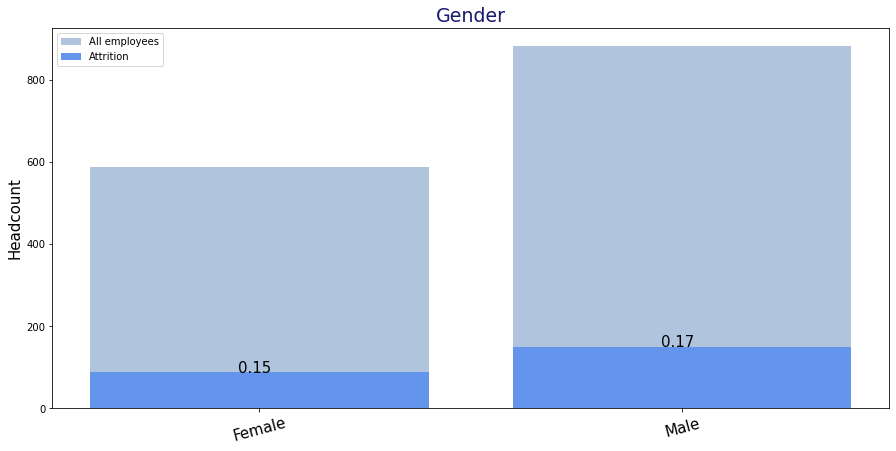

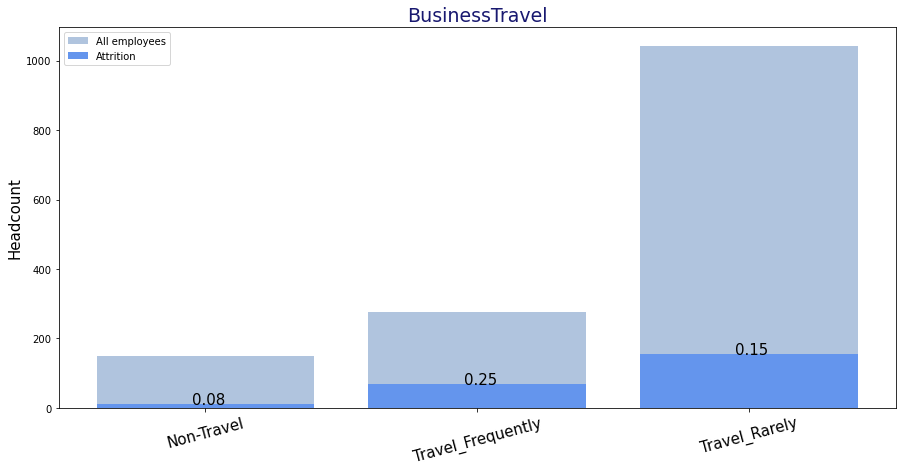

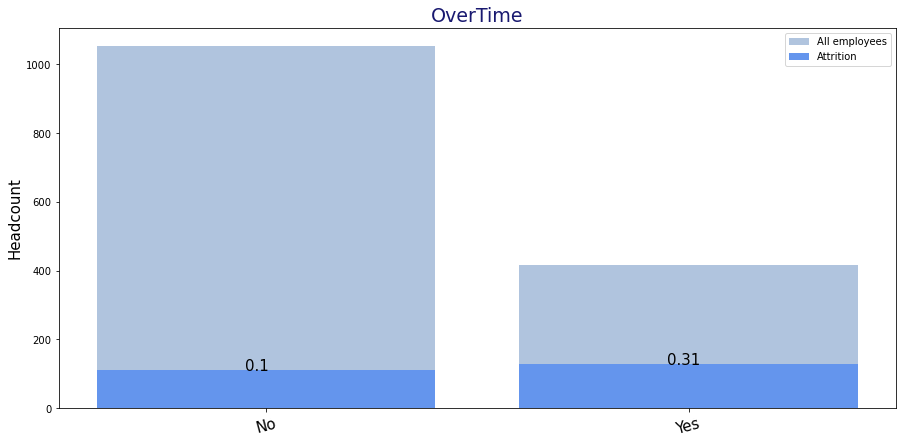

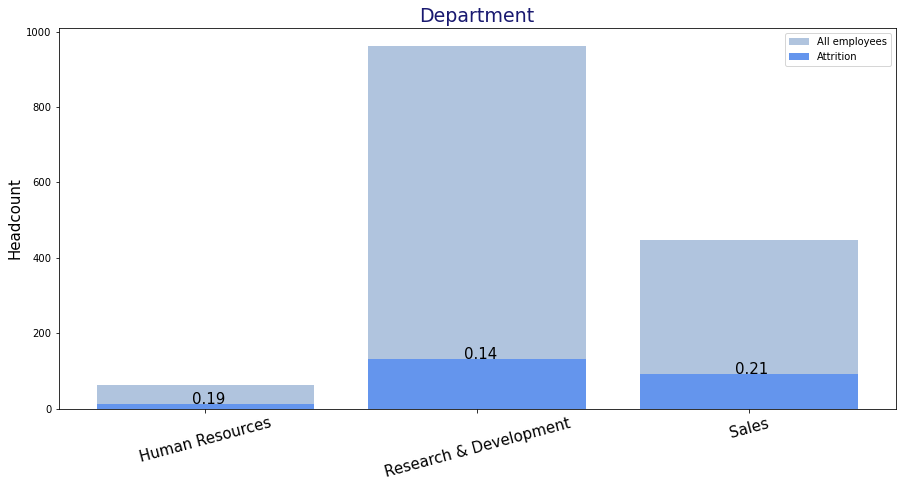

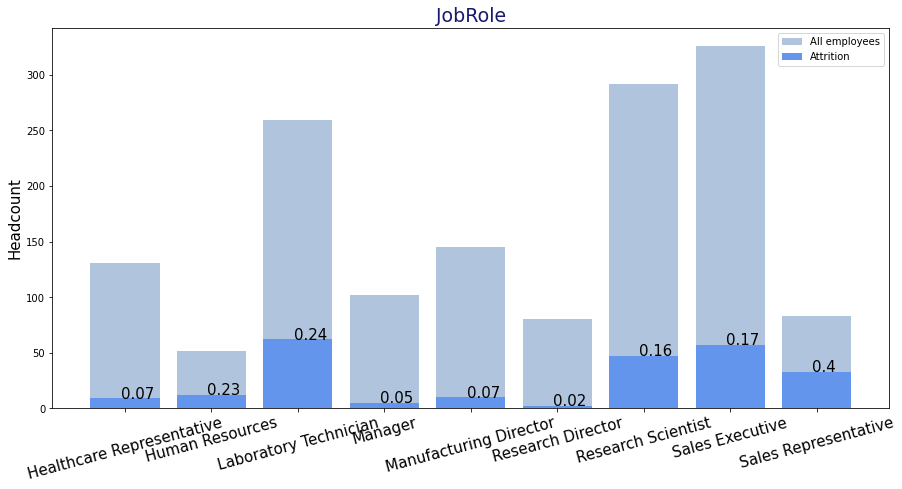

In [6]:
def byfeature(featurename):
    feature = featurename
    
    a = data[feature].value_counts()
    b = data[data['Attrition']=='Yes'][feature].value_counts()
    df = pd.DataFrame(columns = ['1', '2'])
    df['1'] = a
    df['2'] = b
    df['3'] = round(b / a, 2)
    df = df.sort_index(axis=0)
    
    plt.figure(figsize=(15,7))
    plt.bar(df.index, df['1'], color='lightsteelblue',align='center', label = 'All employees')
    plt.bar(df.index, df['2'], color='cornflowerblue',align='center', label = 'Attrition')
    plt.ylabel('Headcount', fontsize=15)
    plt.setp(plt.title(featurename), color='midnightblue', fontsize=19) 
    plt.xticks(rotation=15, fontsize=15)
    plt.legend()
    
    for i in range(0,len(df.index)):
        plt.text(-0.05+i,df['2'][i], df['3'][i], fontsize = 15)
    
    return plt.show()

itemtoknow = ['Gender','BusinessTravel','OverTime','Department','JobRole']

for i in itemtoknow: 
    byfeature(i)

# Logistics Regression

## _Prepare data - deal with categorical data_

In [7]:
categories = ['BusinessTravel','Department','Education','EducationField','Gender','MaritalStatus','OverTime', #'NumCompaniesWorked',
              'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','NumCompaniesWorked',
              'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
categorical = data[categories].astype('object')
categorical = pd.get_dummies(data[categories], drop_first = True)

## _Prepare data - deal with continuous data_

In [8]:
no_use = ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']
continuous = data.drop(columns= categories)
continuous = continuous.drop(columns= no_use)

X = pd.concat([categorical,continuous],axis=1)
Y = data['Attrition'].replace({'Yes': 1, 'No': 0}).values.reshape(-1,1)

## _Prepare data - Split training and test set_

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

## _Prepare data - Standardize continuous data_

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

continuous_variables = list(continuous.columns)

x_train = x_train.reset_index()
del x_train['index']
x_train[continuous_variables] = pd.DataFrame(scaler.fit_transform(x_train[continuous_variables]), columns = continuous_variables)

x_test = x_test.reset_index()
del x_test['index']
x_test[continuous_variables] = pd.DataFrame(scaler.transform(x_test[continuous_variables]))

## _Build logistics regression model (cross validated)_

In [11]:
from sklearn.linear_model import LogisticRegressionCV
import warnings 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    clf = LogisticRegressionCV(cv=5, random_state=0).fit(x_train, y_train)

## _Check model performance - Accuracy, Precision, Recall rate_

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = clf.predict(x_train)
print('Accuracy of training set:', '{:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision of training set: ','{:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall of training set:','{:.2f}'.format(recall_score(y_train, y_pred)))

Accuracy of training set: 0.89
Precision of training set:  0.81
Recall of training set: 0.44


In [13]:
y_result = clf.predict(x_test)
print('Accuracy of test set:','{:.2f}'.format(accuracy_score(y_test, y_result)))
print('Precision of test set: ','{:.2f}'.format(precision_score(y_test, y_result)))
print('Recall of test set:','{:.2f}'.format(recall_score(y_test, y_result)))

Accuracy of test set: 0.92
Precision of test set:  0.73
Recall of test set: 0.58


## _Check model performance - ROC curve_

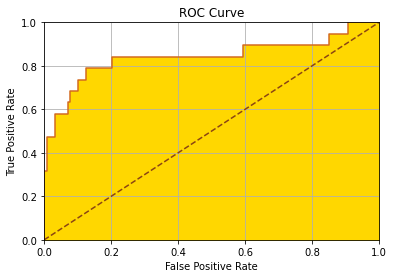

AUC: 0.86


In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1], pos_label =1)
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='chocolate') 
plt.fill_between(fpr, tpr, color='gold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')
plt.grid(True)
plt.show()

from sklearn.metrics import roc_auc_score
print('AUC:', '{:.2f}'.format(roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])))

## _Check Coefficients_

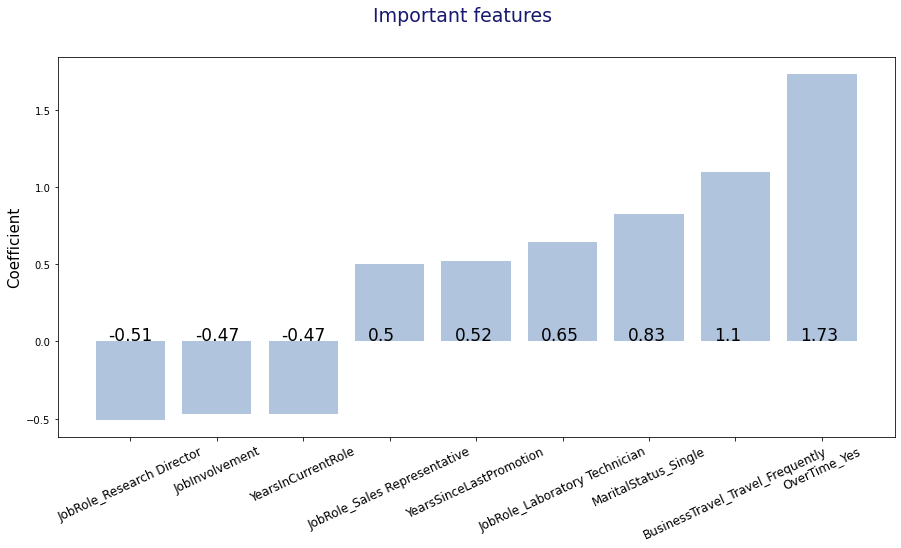

In [15]:
cdf = pd.DataFrame(np.transpose(clf.coef_), x_test.columns.values, columns=['Coefficients'])
cdf = cdf.sort_values(by='Coefficients', ascending=True)
important = cdf[cdf['Coefficients'].abs() >= 0.45]   # Features with coefficients higher than 0.45 or lower than -0.45

plt.figure(figsize=(15,7))
plt.bar(important.index, important['Coefficients'],color='lightsteelblue')
plt.xticks(rotation=25, fontsize=12)

for i in range(0,len(important.index)): 
    plt.text(i-.25 ,.01, round(important['Coefficients'][i],2),fontsize = 17)

plt.ylabel('Coefficient', fontsize=15)
plt.suptitle('Important features',fontsize=19, color='midnightblue')
plt.show()

# Decision Tree

## _Prepare for grid search_

In [16]:
tree_para = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': ["auto","log2",None],        #The number of features to consider when looking for the best split.
    'min_samples_split': [2,3,4,5,6],                #The minimum number of samples required to split an internal node. 
}

## _Search and build the Decision Tree model (Cross validated)_

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)
dtc = DecisionTreeClassifier(random_state=26)

dtc = GridSearchCV(estimator = dtc, scoring = 'f1', param_grid = tree_para, cv=5, n_jobs= -1)

In [ ]:
dtc.fit(x_train, y_train)

## _Display search result_

In [ ]:
dtc.best_params_

## _Check model performance - Accuracy, Precision, Recall rate_

In [ ]:
y_pred = dtc.predict(x_train)
print("Accuracy rate: ", accuracy_score(y_train,y_pred))     
print("Prediction rate: ", precision_score(y_train,y_pred))
print("Recall rate: ", recall_score(y_train,y_pred))

In [ ]:
y_result = dtc.predict(x_test)
print("Accuracy rate: ", accuracy_score(y_test,y_result))     
print("Prediction rate: ", precision_score(y_test,y_result))
print("Recall rate: ", recall_score(y_test,y_result))

## _Check model performance - ROC Curve_

In [ ]:
y_test_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob, pos_label=1)
plt.title('ROC Curve')
plt.plot(fpr, tpr)  
plt.fill_between(fpr, tpr, color='gold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_test_pred_prob, sample_weight=None, max_fpr=None)
print('AUC:', auc)
print()

# Random Forest

## _Prepare for grid search_

In [ ]:
param_grid = {
    'max_depth': [2,3,4,6,8],                      #The maximum depth of the tree. 
    'max_features': ["auto","log2",None],        #The number of features to consider when looking for the best split.
    'min_samples_leaf': [1,2,3,4,5],                 #The minimum number of samples required to be at a leaf node. 
    'min_samples_split': [2,3,4,5,6],                #The minimum number of samples required to split an internal node. 
    'n_estimators': [5,10,20,50,100,200]              #The number of trees in the forest.
}

## _Search and build the Random Forest model (Cross validated)_

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)
hprf = RandomForestClassifier(random_state=26)
hprf = GridSearchCV(estimator = hprf, scoring='f1', param_grid = param_grid, n_jobs = -1, verbose = 2, cv=5)

In [ ]:
hprf.fit(x_train, y_train)

## _Display search result_

In [ ]:
hprf.best_params_

## _Check model performance - Accuracy, Precision, Recall rate_

In [ ]:
y_pred = hprf.predict(x_train)
print("Accuracy rate: ", accuracy_score(y_train, y_pred))     
print("Prediction rate: ", precision_score(y_train, y_pred))
print("Recall rate: ", recall_score(y_train, y_pred))

In [ ]:
y_result = hprf.predict(x_test)
print("Accuracy rate: ", accuracy_score(y_test, y_result))     
print("Prediction rate: ", precision_score(y_test, y_result))
print("Recall rate: ", recall_score(y_test, y_result))

## _Check model performance - ROC Curve_

In [ ]:
y_test_pred_prob_hp_t = hprf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_hp_t, pos_label=1)
plt.title('ROC Curve')
plt.plot(fpr, tpr)  
plt.fill_between(fpr, tpr, color='gold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_test_pred_prob_hp_t, sample_weight=None, max_fpr=None)
print('AUC:', auc)
print()

## Findings

Based on the analysis, we can discover below trends from the data set: 

1. __<font color='Navy'>"OverTime"</font>__ and __<font color='Navy'>"BusinessTravel"</font>__ are the top two important features that affect employees' attrition. Employees working overtime and employees taking business travel frequently have the tendency to churn.

2. Other factors include __<font color='Navy'>JobRole, Marital Status, Years Since Last Promotion and Years in Current Role.</font>__
    - <font color='Navy'>_JobRole_</font>:  <font color='saddlebrown'>_Research Director_</font> has lower possibility, whereas <font color='saddlebrown'>_Sales Representative and Laboratory Technician_</font> have higher possibility to leave the company. 
    
    - <font color='Navy'>_Marital Status_</font>: Employees who are <font color='saddlebrown'>_single_</font> have higher possibility to churn. 
    
    - <font color='Navy'>_Years Since Last Promotion and Years in Current Role_</font>:  Employees recently promoted have higher possibility, while employees who stay in current role for longer time have lower possibility to churn. 

## Recommendation

Through the proeject, the following recommendations are provided for Human Resources Department and senior management team.

1. A logistics regression model with accuracy rate of <font color='Navy'>__0.93__</font> is developed for predicting attrition. 

2. More resources can be allocated to compensate employees <font color='Navy'>__overtime hours and business travels__</font> in order to lower attrition rate. 

3. It's recommneded to collect information such as <font color='Navy'>__"whether the employee is a manager", "benefit received", "location"__</font> to include in the model in the future.

# <center>End</center>